<a href="https://colab.research.google.com/github/mzdwedar/python-data-analysis/blob/main/KPMG-Data-Analytics-Virtual-Internship/data-cleaning/Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from data_cleaning import *

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
demo = pd.read_excel('KPMG_raw_data.xlsx', sheet_name='CustomerDemographic', header=1)
address = pd.read_excel('KPMG_raw_data.xlsx', sheet_name='CustomerAddress', header=1)
transactions = pd.read_excel('KPMG_raw_data.xlsx', sheet_name='Transactions', header=1)
new_demo = pd.read_excel('KPMG_raw_data.xlsx', sheet_name='NewCustomerList', header=1)

In [ ]:
# .age_bins.value_counts(sort=False).plot.bar(rot=0, title='Age', color="b", figsize=(6,4)).get_figure().savefig('age.png')

In [ ]:
len(demo), len(address), len(transactions), len(new_demo)

(4000, 3999, 20000, 1000)

In [ ]:
## Transactions
# some of the customer_id isn't registered in demo_table (i.e 5034)
# brand, product_line, product_class, product_size, standard_cost, product_first_sold_date has the same 'NaN' all belong to product_id 0

# transaction_id: primary_key
# product_id: most_purchased product? to uint8
# customer_id: the one with most purchases?
# online order: isna, binary (0,1)
# order_status: isna, binary(approved, cancelled)
# brand: isna, categorical
# product_line: isna, categorical
# product_class: isna, category
# product_size: isna, category

## Demo
# Gender: to_categorical, F -> Female, Femal -> Female, M -> Male
# last_name: isna
# default: drop
# owns_car: (Yes, No) to binary(categorical)
# tenure: to integer, isna
# deceased_indictor: (N, Y) to_categorical
# wealth_segment: ('Mass Customer', 'Affluent Customer', 'High Net Worth') to categorical
# job_industry_category: categorical, isna
# job_title: string, isna
# DOB: dateofbirth: isna
# past_3_years_bike_related_purchases: isna, to int16

In [ ]:
np.iinfo(np.uint8)

iinfo(min=0, max=255, dtype=uint8)

In [ ]:
new_demo = pd.read_excel('KPMG_raw_data.xlsx', sheet_name='NewCustomerList', usecols= str,header=1)

In [ ]:
new_demo.loc[:,~new_demo.columns.str.match("Unnamed")]

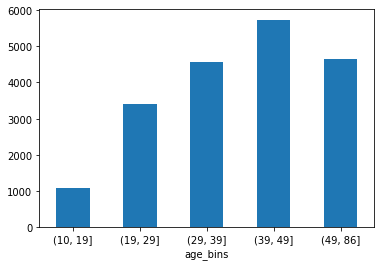

In [ ]:
#age bins
(demo
 .pipe(clean_demo)
 .merge(clean_transactions(transactions), on='customer_id')
).groupby('age_bins').count().customer_id.plot.bar(rot=0).get_figure().savefig('age.png')

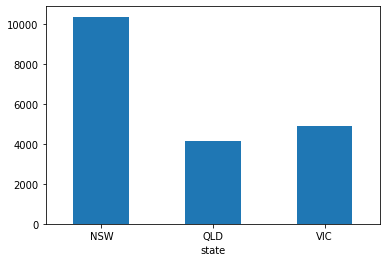

In [ ]:
#state
(demo
 .pipe(clean_demo)
 .merge(clean_transactions(transactions), on='customer_id')
 .merge(clean_address(address), on='customer_id')
).groupby('state').count().customer_id.plot.bar(rot=0)

In [ ]:
(demo
 .pipe(clean_demo)
 .merge(clean_transactions(transactions), on='customer_id')
).groupby('age_bins').count()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
age_bins,,,,,,,,,,,,,,,,,,,,,
"(10, 19]",1069,1069,1012,1069,1069,1069,1069,1069,1069,1069,...,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069
"(19, 29]",3410,3410,3274,3410,3410,3410,3410,3410,3410,3410,...,3410,3410,3410,3410,3410,3410,3410,3410,3410,3410
"(29, 39]",4563,4563,4464,4563,4563,4563,4563,4563,4563,4563,...,4563,4563,4563,4563,4563,4563,4563,4563,4563,4563
"(39, 49]",5735,5735,5535,5735,5735,5735,5735,5735,5735,5735,...,5735,5735,5735,5735,5735,5735,5735,5735,5735,5735
"(49, 86]",4657,4657,4523,4657,4657,4657,4657,4657,4657,4657,...,4657,4657,4657,4657,4657,4657,4657,4657,4657,4657
